In [28]:
# ! Followed tutorial("https://www.youtube.com/watch?v=TF2Nx_ifmrU")

import yfinance as yf
import os
import pandas as pd

In [29]:
# * Configuration
ticker_name = "TSLA"
related_ticker_names = [
    "SPY", 
    "QQQ", 
    "ITOT", 
    "VTI", 
    "AMZN", 
    "AAPL", 
    "AMC", 
    "NVDA", 
    "MSFT", 
    "ROKU", 
    "GOOGL", 
    "NFLX",
    "DOGE-USD",
    "BTC-USD",
    "ETH-USD"
]
related_ticker_predictor_fields = ["open", "high", "low", "close", "volume"]
period = '2y'
backtest_start = 7
backtest_step = 1
data_split_point = 73 # want to follow best practices: 80% train, 20% test -- for 2y period, 

In [30]:
# * Get historical & related data, clean all data
ticker = yf.Ticker(ticker_name)

historical_data_related_tickers = related_ticker_names.copy()
for i in range(0,len(related_ticker_names)):
    related_ticker = historical_data_related_tickers[i]
    related_ticker = yf.Ticker(related_ticker).history(period=period)
    del related_ticker["Dividends"]
    del related_ticker["Stock Splits"]
    related_ticker.index = pd.to_datetime(related_ticker.index.tz_localize(None))
    related_ticker.columns = [c.lower() for c in related_ticker.columns]
    historical_data_related_tickers[i] = related_ticker.dropna()

In [31]:
historical_data = ticker.history(period=period)

In [32]:
del historical_data["Dividends"]
del historical_data["Stock Splits"]

In [33]:
historical_data.index = pd.to_datetime(historical_data.index.tz_localize(None))

In [34]:
historical_data.columns = [c.lower() for c in historical_data.columns]

<Axes: xlabel='Date'>

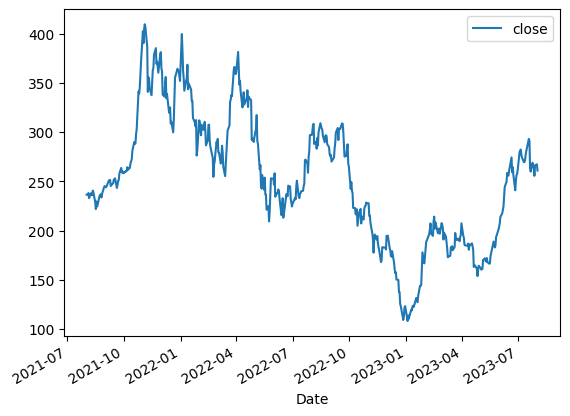

In [35]:
historical_data.plot.line(y="close", use_index=True)

In [36]:
# * Get Wikipedia edits & merge into historical dataframe
wiki = pd.read_csv("wikipedia_edits.csv",index_col=0, parse_dates=True)
historical_data = historical_data.merge(wiki, left_index=True, right_index=True)

In [37]:
# * Merge related stock tickers
for i in range(0,len(related_ticker_names)):
    for related_predictor in related_ticker_predictor_fields:
        historical_data[f"{related_ticker_names[i]}_{related_predictor}"] = historical_data_related_tickers[i][related_predictor]

In [38]:
historical_data

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,SPY_open,SPY_high,...,BTC-USD_open,BTC-USD_high,BTC-USD_low,BTC-USD_close,BTC-USD_volume,ETH-USD_open,ETH-USD_high,ETH-USD_low,ETH-USD_close,ETH-USD_volume
2021-08-02,233.333328,242.313339,232.800003,236.556671,100847400,4.366667,-0.010681,0.044865,427.191107,427.763485,...,39907.261719,40419.179688,38746.347656,39201.945312,25595265436,2557.774658,2665.730957,2511.375244,2610.153320,22162754104
2021-08-03,239.666672,240.883331,233.669998,236.580002,64860900,4.333333,-0.010681,0.044865,425.347860,428.103052,...,39178.402344,39750.031250,37782.050781,38152.980469,26189830450,2609.413086,2630.314209,2449.353516,2502.349609,22696753413
2021-08-04,237.000000,241.633331,236.309998,236.973328,51007800,4.333333,-0.010681,0.044865,426.647834,427.947817,...,38213.332031,39952.296875,37589.164062,39747.503906,25372562724,2508.544922,2764.443604,2463.469482,2724.619873,25038698173
2021-08-05,238.666672,240.316666,237.136673,238.210007,38758800,4.300000,-0.010681,0.044865,427.074703,428.656035,...,39744.515625,41341.933594,37458.003906,40869.554688,35185031017,2725.669678,2840.430664,2540.684082,2827.328857,31057928075
2021-08-06,237.300003,238.776672,232.543335,233.033340,46869000,4.300000,-0.010681,0.044865,428.898547,429.713460,...,40865.867188,43271.660156,39932.179688,42816.500000,38226483046,2827.503418,2944.903320,2727.792725,2890.941650,26528577879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,263.250000,268.040009,261.750000,264.350006,95856200,0.966667,-0.006656,0.050000,454.470001,456.989990,...,29225.759766,29675.552734,29113.912109,29354.972656,13497554655,1857.696533,1886.974121,1849.436890,1872.159912,5781548155
2023-07-27,268.309998,269.130005,255.300003,255.710007,103697300,1.133333,0.004056,0.050000,459.019989,459.440002,...,29353.798828,29560.966797,29099.351562,29210.689453,10770779217,1872.086304,1885.591553,1855.321533,1860.357178,4291339248
2023-07-28,259.859985,267.250000,258.230011,266.440002,111149300,1.166667,0.004056,0.050000,455.880005,457.779999,...,29212.164062,29521.513672,29125.845703,29319.246094,11218474952,1860.702515,1881.457275,1857.048950,1874.744873,3800973336
2023-07-31,267.480011,269.079987,263.779999,267.429993,84582200,1.300000,0.030389,0.050000,457.410004,458.160004,...,29278.314453,29489.873047,29131.578125,29230.111328,11656781982,1861.755249,1875.629395,1851.915405,1856.162354,4391613314


In [39]:
# * Add predictors
# tomorrow
# target
# rolling
# related
predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
for i in range(0,len(related_ticker_names)):
    for related_predictor in related_ticker_predictor_fields:
        predictors.append(f"{related_ticker_names[i]}_{related_predictor}")
        
historical_data["tomorrow"] = historical_data["close"].shift(-1)
historical_data["target"] = (historical_data["tomorrow"] > historical_data["close"]).astype(int)

In [40]:
# * Verify up/down values for target are evenly distributed
historical_data["target"].value_counts()

target
1    272
0    231
Name: count, dtype: int64

In [ ]:
historical_data.plot()

In [41]:
# * Split data into train/test sets
train_set = historical_data.iloc[:-data_split_point] # everything except last 200 days
test_set = historical_data[-data_split_point:] # last 200 days

In [42]:
# * Build prediction model
# Baseline model - Random Forest
from sklearn.ensemble import RandomForestClassifier
# n estimators in number of individual estimators we want to train
# min sample split is minimum number of samples before an individual decision tree will split its nodes
#     - higher number will result in lower performance on the training set, will result in less overfit
#     - lower number will result in higher performance on the trainin set, but will result in more overfit
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

model.fit(train_set[predictors], train_set["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [43]:
from sklearn.metrics import precision_score

predictions = model.predict(test_set[predictors])
predictions = pd.Series(predictions, index=test_set.index)
precision_score(test_set["target"], predictions)

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [44]:
# * Backtest historical dataframe
# To get a better error estimation, we want to backtest
def predict(train_set, test_set, predictors, model):
    model.fit(train_set[predictors], train_set["target"])
    predictions = model.predict(test_set[predictors])
    predictions = pd.Series(predictions, index=test_set.index, name="predictions")
    combined = pd.concat([test_set["target"], predictions], axis=1)
    return combined

In [45]:
# Because we don't have historical data for early periods of the data frame, we need to skip about 3 years (1095 days)
# Want to generate new predictions about every 6 months (150 days)
def backtest(data, model, predictors, start=backtest_start, step=backtest_step):
    try:
        all_predictions = []

        for i in range(start, data.shape[0], step):
            train = data.iloc[0:i].copy()
            test = data.iloc[i:(i+step)].copy()
            predictions = predict(train, test, predictors, model)            
            all_predictions.append(predictions)
            
        return pd.concat(all_predictions)

    except Exception as inst:
        print(type(inst))    # the exception type
        print(inst.args)     # arguments stored in .args
        print(inst)          # __str__ allows args to be printed directly,
                             # but may be overridden in exception subclasses
        print('all_predictions', all_predictions)


In [46]:
# Upgrade the model to an XGBoost classifier
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(historical_data, model, predictors)

precision_score(predictions["target"], predictions["predictions"])

0.5431654676258992

In [47]:
# * Compute calculated predictors
def compute_rolling(historical_data):
    horizons = [2, 7, 60, 365]
    new_predictors = predictors.copy()
        
    for horizon in horizons:
        rolling_averages = historical_data.rolling(horizon, min_periods=1).mean() # min_periods avoids NA valus by computing data for periods of 1

        ratio_column = f"close_ratio_{horizon}"
        historical_data[ratio_column] = historical_data["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        historical_data[edit_column] = rolling_averages["edit_count"]

        rolling = historical_data.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        historical_data[trend_column] = rolling["target"]

        new_predictors += [ratio_column, trend_column, edit_column]
    return historical_data, new_predictors

In [48]:
historical_data, new_predictors = compute_rolling(historical_data.copy())

In [49]:
historical_data

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,SPY_open,SPY_high,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2021-08-02,233.333328,242.313339,232.800003,236.556671,100847400,4.366667,-0.010681,0.044865,427.191107,427.763485,...,NaN,1.000000,4.366667,NaN,1.000000,4.366667,NaN,1.000000,4.366667,NaN
2021-08-03,239.666672,240.883331,233.669998,236.580002,64860900,4.333333,-0.010681,0.044865,425.347860,428.103052,...,1.0,1.000049,4.350000,1.000000,1.000049,4.350000,1.000000,1.000049,4.350000,1.000000
2021-08-04,237.000000,241.633331,236.309998,236.973328,51007800,4.333333,-0.010681,0.044865,426.647834,427.947817,...,1.0,1.001141,4.344444,1.000000,1.001141,4.344444,1.000000,1.001141,4.344444,1.000000
2021-08-05,238.666672,240.316666,237.136673,238.210007,38758800,4.300000,-0.010681,0.044865,427.074703,428.656035,...,1.0,1.004766,4.333333,1.000000,1.004766,4.333333,1.000000,1.004766,4.333333,1.000000
2021-08-06,237.300003,238.776672,232.543335,233.033340,46869000,4.300000,-0.010681,0.044865,428.898547,429.713460,...,0.5,0.986298,4.326667,0.750000,0.986298,4.326667,0.750000,0.986298,4.326667,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,263.250000,268.040009,261.750000,264.350006,95856200,0.966667,-0.006656,0.050000,454.470001,456.989990,...,0.0,0.970748,0.961905,0.285714,1.156386,1.243333,0.650000,1.134374,2.116530,0.528767
2023-07-27,268.309998,269.130005,255.300003,255.710007,103697300,1.133333,0.004056,0.050000,459.019989,459.440002,...,0.0,0.957931,0.976190,0.142857,1.110986,1.243889,0.650000,1.097889,2.112603,0.528767
2023-07-28,259.859985,267.250000,258.230011,266.440002,111149300,1.166667,0.004056,0.050000,455.880005,457.779999,...,0.5,1.011563,0.995238,0.285714,1.148777,1.245000,0.666667,1.144231,2.108584,0.531507
2023-07-31,267.480011,269.079987,263.779999,267.429993,84582200,1.300000,0.030389,0.050000,457.410004,458.160004,...,1.0,1.012833,1.052381,0.428571,1.144262,1.248333,0.666667,1.148813,2.104932,0.531507


In [50]:
# * Backtest & Evaluate
predictions = backtest(historical_data, model, new_predictors)

In [51]:
precision_score(predictions["target"], predictions["predictions"])

0.5472972972972973

In [52]:
predictions

,target,predictions
2021-08-11,1,1
2021-08-12,0,1
2021-08-13,0,1
2021-08-16,0,1
2021-08-17,1,0
...,...,...
2023-07-26,0,0
2023-07-27,1,0
2023-07-28,1,0
2023-07-31,0,1


In [ ]:
# * Update model to transformer
from transformers import TimeSeriesTransformerForPrediction

transformer_model = TimeSeriesTransformerForPrediction.from_pretrained("huggingface/time-series-transformer-tourism-monthly")

# Train model
outputs = transformer_model(
    past_values=historical_data["close"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"],
    static_real_features=batch["static_real_features"],
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
)

loss = outputs.loss
loss.backward()

# during inference, one only provides past values
# as well as possible additional features
# the model autoregressively generates future values
outputs = model.generate(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"],
    static_real_features=batch["static_real_features"],
    future_time_features=batch["future_time_features"],
)

mean_prediction = outputs.sequences.mean(dim=1)

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(historical_data, model, predictors)

precision_score(predictions["target"], predictions["predictions"])

In [26]:
# TODO: [ ] add predictor/s for sentiment from tweets, google trends, stock news
# TODO: [x] add predictor/s for related stock tickers (e.g. SPY, TSLA, QQQ, APL)
# TODO: [x] add predictor/s for cryptocurrency tickers (e.g. DOGE-USD, BTC-USD, ETH-USD)
# TODO: [ ] add transformer model/s
# TODO: [ ] add prediction for valuation of stock options during intra-period contracts